In [165]:
import lsst.meas.extensions.gaap
import lsst.afw.table as afwTable
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [124]:
pathname = "/home/kannawad/jhome/GAaP_analysis/GaussianFluxMonteCarlo.fits"
catalog = afwTable.SourceCatalog.readFits(pathname)
catalog.asAstropy()

id,coord_ra,coord_dec,parent,deblend_nChild,truth_instFlux,slot_Centroid_instFlux,slot_ModelFlux_instFlux,slot_Shape_instFlux,truth_x,slot_Centroid_x,slot_ModelFlux_x,slot_Shape_x,truth_y,slot_Centroid_y,slot_ModelFlux_y,slot_Shape_y,truth_xErr,slot_Centroid_xErr,slot_ModelFlux_xErr,slot_Shape_xErr,truth_yErr,slot_Centroid_yErr,slot_ModelFlux_yErr,slot_Shape_yErr,truth_x_y_Cov,slot_Centroid_x_y_Cov,slot_ModelFlux_x_y_Cov,slot_Shape_x_y_Cov,truth_flag,base_GaussianFlux_flag_badCentroid,base_GaussianFlux_flag_badShape,slot_Centroid_flag,slot_ModelFlux_flag,slot_Shape_flag,truth_xx,slot_Centroid_xx,slot_ModelFlux_xx,slot_Shape_xx,truth_yy,slot_Centroid_yy,slot_ModelFlux_yy,slot_Shape_yy,truth_xy,slot_Centroid_xy,slot_ModelFlux_xy,slot_Shape_xy,truth_isStar,slot_Centroid_isStar,slot_ModelFlux_isStar,slot_Shape_isStar,base_GaussianFlux_instFlux,base_GaussianFlux_instFluxErr,base_GaussianFlux_flag
,rad,rad,,,ct,ct,ct,ct,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix2,pix2,pix2,pix2,,,,,,,pix2,pix2,pix2,pix2,pix2,pix2,pix2,pix2,pix2,pix2,pix2,pix2,,,,,ct,ct,
int64,float64,float64,int64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,bool,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,bool,float64,float64,bool
2,nan,nan,0,0,100000.0,100000.0,100000.0,100000.0,149.9,149.9,149.9,149.9,50.3,50.3,50.3,50.3,0.21674958,0.21674958,0.21674958,0.21674958,nan,nan,nan,nan,0.16055207,0.16055207,0.16055207,0.16055207,False,False,False,False,False,False,12.0,12.0,12.0,12.0,13.0,13.0,13.0,13.0,3.0,3.0,3.0,3.0,False,False,False,False,99677.25777785426,1234.3384730116545,False
2,nan,nan,0,0,100000.0,100000.0,100000.0,100000.0,149.9,149.9,149.9,149.9,50.3,50.3,50.3,50.3,0.21674958,0.21674958,0.21674958,0.21674958,nan,nan,nan,nan,0.16055207,0.16055207,0.16055207,0.16055207,False,False,False,False,False,False,12.0,12.0,12.0,12.0,13.0,13.0,13.0,13.0,3.0,3.0,3.0,3.0,False,False,False,False,101147.40040067793,1234.3384730116545,False
2,nan,nan,0,0,100000.0,100000.0,100000.0,100000.0,149.9,149.9,149.9,149.9,50.3,50.3,50.3,50.3,0.21674958,0.21674958,0.21674958,0.21674958,nan,nan,nan,nan,0.16055207,0.16055207,0.16055207,0.16055207,False,False,False,False,False,False,12.0,12.0,12.0,12.0,13.0,13.0,13.0,13.0,3.0,3.0,3.0,3.0,False,False,False,False,99344.46980602777,1234.3384730116545,False
2,nan,nan,0,0,100000.0,100000.0,100000.0,100000.0,149.9,149.9,149.9,149.9,50.3,50.3,50.3,50.3,0.21674958,0.21674958,0.21674958,0.21674958,nan,nan,nan,nan,0.16055207,0.16055207,0.16055207,0.16055207,False,False,False,False,False,False,12.0,12.0,12.0,12.0,13.0,13.0,13.0,13.0,3.0,3.0,3.0,3.0,False,False,False,False,100833.85688341787,1234.3384730116545,False
2,nan,nan,0,0,100000.0,100000.0,100000.0,100000.0,149.9,149.9,149.9,149.9,50.3,50.3,50.3,50.3,0.21674958,0.21674958,0.21674958,0.21674958,nan,nan,nan,nan,0.16055207,0.16055207,0.16055207,0.16055207,False,False,False,False,False,False,12.0,12.0,12.0,12.0,13.0,13.0,13.0,13.0,3.0,3.0,3.0,3.0,False,False,False,False,100921.04778676739,1234.3384730116545,False
2,nan,nan,0,0,100000.0,100000.0,100000.0,100000.0,149.9,149.9,149.9,149.9,50.3,50.3,50.3,50.3,0.21674958,0.21674958,0.21674958,0.21674958,nan,nan,nan,nan,0.16055207,0.16055207,0.16055207,0.16055207,False,False,False,False,False,False,12.0,12.0,12.0,12.0,13.0,13.0,13.0,13.0,3.0,3.0,3.0,3.0,False,False,False,False,100843.94056888181,1234.3384730116545,False
2,nan,nan,0,0,100000.0,100000.0,100000.0,100000.0,149.9,149.9,149.9,149.9,50.3,50.3,50.3,50.3,0.21674958,0.21674958,0.21674958,0.21674958,nan,nan,nan,nan,0.16055207,0.16055207,0.16055207,0.16055207,False,False,False,False,False,False,12.0,12.0,12.0,12.0,13.0,13.0,13.0,13.0,3.0,3.0,3.0,3.0,False,False,False,False,98294.52865929285,1234.3384730116545,False
2,nan,nan,0,0,1

0.9968740768481672 1.0000000000000469


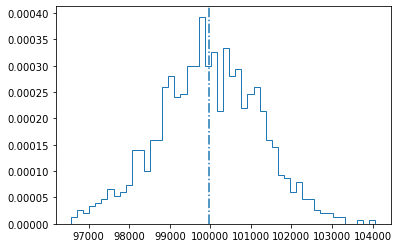

In [125]:
bins = 50
sF, sigma2 = 1.15, 16
baseName = "base_GaussianFlux"
fig, ax = plt.subplots()
_n, _bins, _patches = ax.hist(catalog[baseName+"_instFlux"], bins=bins, histtype='step', density=True)
binwidth = _bins[1]-_bins[0]
bincenters = 0.5*(_bins[1:]+_bins[:-1])
err = catalog[baseName+"_instFluxErr"].mean()
mu = catalog["truth_instFlux"][0]
X = np.linspace(mu-6*err, mu+6*err, 101)
ax.axvline(catalog[baseName+"_instFlux"].mean(),ls='-.', color='C0')
#ax.plot(bincenters, gauss(bincenters, mu, err**2), '-')

print(np.sum(gauss(bincenters, mu, err**2)*binwidth), _n.sum()*binwidth)

In [205]:
pathname = "/home/kannawad/jhome/GAaP_analysis/gaapMonteCarlo.fits"
catalog = afwTable.SourceCatalog.readFits(pathname)
catalog.asAstropy()

id,coord_ra,coord_dec,parent,deblend_nChild,truth_instFlux,slot_Centroid_instFlux,slot_ModelFlux_instFlux,slot_Shape_instFlux,truth_x,slot_Centroid_x,slot_ModelFlux_x,slot_Shape_x,truth_y,slot_Centroid_y,slot_ModelFlux_y,slot_Shape_y,truth_xErr,slot_Centroid_xErr,slot_ModelFlux_xErr,slot_Shape_xErr,truth_yErr,slot_Centroid_yErr,slot_ModelFlux_yErr,slot_Shape_yErr,truth_x_y_Cov,slot_Centroid_x_y_Cov,slot_ModelFlux_x_y_Cov,slot_Shape_x_y_Cov,truth_flag,slot_Centroid_flag,slot_ModelFlux_flag,slot_Shape_flag,truth_xx,slot_Centroid_xx,slot_ModelFlux_xx,slot_Shape_xx,truth_yy,slot_Centroid_yy,slot_ModelFlux_yy,slot_Shape_yy,truth_xy,slot_Centroid_xy,slot_ModelFlux_xy,slot_Shape_xy,truth_isStar,slot_Centroid_isStar,slot_ModelFlux_isStar,slot_Shape_isStar,ext_gaap_GaapFlux_flag,ext_gaap_GaapFlux_1_05x_3_0_instFlux,ext_gaap_GaapFlux_1_05x_3_0_instFluxErr,ext_gaap_GaapFlux_1_05x_4_0_instFlux,ext_gaap_GaapFlux_1_05x_4_0_instFluxErr,ext_gaap_GaapFlux_1_05x_5_0_instFlux,ext_gaap_GaapFlux_1_05x_5_0_instFluxErr,ext_gaap_GaapFlux_1_1x_3_0_instFlux,ext_gaap_GaapFlux_1_1x_3_0_instFluxErr,ext_gaap_GaapFlux_1_1x_4_0_instFlux,ext_gaap_GaapFlux_1_1x_4_0_instFluxErr,ext_gaap_GaapFlux_1_1x_5_0_instFlux,ext_gaap_GaapFlux_1_1x_5_0_instFluxErr,ext_gaap_GaapFlux_1_15x_3_0_instFlux,ext_gaap_GaapFlux_1_15x_3_0_instFluxErr,ext_gaap_GaapFlux_1_15x_4_0_instFlux,ext_gaap_GaapFlux_1_15x_4_0_instFluxErr,ext_gaap_GaapFlux_1_15x_5_0_instFlux,ext_gaap_GaapFlux_1_15x_5_0_instFluxErr,ext_gaap_GaapFlux_1_2x_3_0_instFlux,ext_gaap_GaapFlux_1_2x_3_0_instFluxErr,ext_gaap_GaapFlux_1_2x_4_0_instFlux,ext_gaap_GaapFlux_1_2x_4_0_instFluxErr,ext_gaap_GaapFlux_1_2x_5_0_instFlux,ext_gaap_GaapFlux_1_2x_5_0_instFluxErr,ext_gaap_GaapFlux_1_25x_3_0_instFlux,ext_gaap_GaapFlux_1_25x_3_0_instFluxErr,ext_gaap_GaapFlux_1_25x_4_0_instFlux,ext_gaap_GaapFlux_1_25x_4_0_instFluxErr,ext_gaap_GaapFlux_1_25x_5_0_instFlux,ext_gaap_GaapFlux_1_25x_5_0_instFluxErr,ext_gaap_GaapFlux_1_3x_3_0_instFlux,ext_gaap_GaapFlux_1_3x_3_0_instFluxErr,ext_gaap_GaapFlux_1_3x_4_0_instFlux,ext_gaap_GaapFlux_1_3x_4_0_instFluxErr,ext_gaap_GaapFlux_1_3x_5_0_instFlux,ext_gaap_GaapFlux_1_3x_5_0_instFluxErr,ext_gaap_GaapFlux_1_4x_3_0_instFlux,ext_gaap_GaapFlux_1_4x_3_0_instFluxErr,ext_gaap_GaapFlux_1_4x_4_0_instFlux,ext_gaap_GaapFlux_1_4x_4_0_instFluxErr,ext_gaap_GaapFlux_1_4x_5_0_instFlux,ext_gaap_GaapFlux_1_4x_5_0_instFluxErr,ext_gaap_GaapFlux_1_05x_3_0_flag_bigpsf,ext_gaap_GaapFlux_1_05x_4_0_flag_bigpsf,ext_gaap_GaapFlux_1_05x_5_0_flag_bigpsf,ext_gaap_GaapFlux_1_1x_3_0_flag_bigpsf,ext_gaap_GaapFlux_1_1x_4_0_flag_bigpsf,ext_gaap_GaapFlux_1_1x_5_0_flag_bigpsf,ext_gaap_GaapFlux_1_15x_3_0_flag_bigpsf,ext_gaap_GaapFlux_1_15x_4_0_flag_bigpsf,ext_gaap_GaapFlux_1_15x_5_0_flag_bigpsf,ext_gaap_GaapFlux_1_2x_3_0_flag_bigpsf,ext_gaap_GaapFlux_1_2x_4_0_flag_bigpsf,ext_gaap_GaapFlux_1_2x_5_0_flag_bigpsf,ext_gaap_GaapFlux_1_25x_3_0_flag_bigpsf,ext_gaap_GaapFlux_1_25x_4_0_flag_bigpsf,ext_gaap_GaapFlux_1_25x_5_0_flag_bigpsf,ext_gaap_GaapFlux_1_3x_3_0_flag_bigpsf,ext_gaap_GaapFlux_1_3x_4_0_flag_bigpsf,ext_gaap_GaapFlux_1_3x_5_0_flag_bigpsf,ext_gaap_GaapFlux_1_4x_3_0_flag_bigpsf,ext_gaap_GaapFlux_1_4x_4_0_flag_bigpsf,ext_gaap_GaapFlux_1_4x_5_0_flag_bigpsf,ext_gaap_GaapFlux_flag_edge
,rad,rad,,,ct,ct,ct,ct,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix2,pix2,pix2,pix2,,,,,pix2,pix2,pix2,pix2,pix2,pix2,pix2,pix2,pix2,pix2,pix2,pix2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int64,float64,float64,int64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,flo

In [206]:
def gauss(x, mu, sigma2):
    return np.sqrt(0.5/(np.pi*sigma2))*np.exp(-0.5*(x-mu)**2/sigma2)

0.9978220927412037 0.9999999999999792


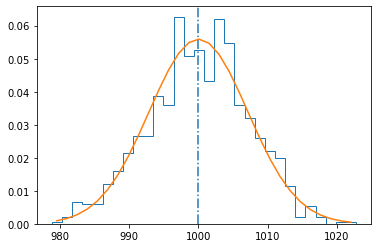

In [207]:
bins = 30
sF, sigma2 = 1.15, 9
baseName = lsst.meas.extensions.gaap.GaapFluxConfig.getGaapResultName(sF=sF, sigma=np.sqrt(sigma2), name="ext_gaap_GaapFlux")
fig, ax = plt.subplots()
_n, _bins, _patches = ax.hist(catalog[baseName+"_instFlux"], bins=bins, histtype='step', density=True)
binwidth = _bins[1]-_bins[0]
bincenters = 0.5*(_bins[1:]+_bins[:-1])
err = catalog[baseName+"_instFluxErr"].mean()
mu = catalog["truth_instFlux"][0]
X = np.linspace(mu-6*err, mu+6*err, 101)
ax.axvline(catalog[baseName+"_instFlux"].mean(),ls='-.', color='C0')
ax.plot(bincenters, gauss(bincenters, mu, err**2), '-')

print(np.sum(gauss(bincenters, mu, err**2)*binwidth), _n.sum()*binwidth)

In [208]:
def func1(x, p, A):
    return A*x/np.sqrt(x-p**2)

def errAnalytical(sigma2, sF):
    return 2*np.sqrt(np.pi*(sigma2/np.sqrt(sigma2-(2*sF)**2)))*np.sqrt((sigma2-4*sF**2)/(sigma2-4)) #*np.sqrt((sigma2-(2**2))/(sigma2-(2-sF**2)*4))

def corrCorrection(sigma2, sF):
    return np.sqrt((sigma2-4*sF**2)/(sigma2-4))

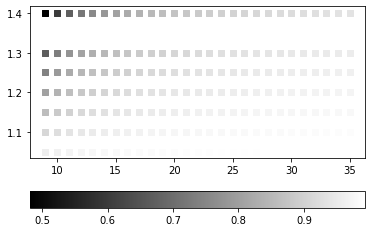

In [209]:
X, Y = np.meshgrid(list(range(9,36)), [1.05, 1.10, 1.15, 1.2, 1.25, 1.3, 1.4])
_im = plt.scatter(X,Y,c=corrCorrection(X,Y), marker='s', cmap=cm.gray)
_cbar = plt.colorbar(_im, orientation='horizontal')

In [210]:

x = np.array(list(range(9,36)))
for sF in [1.05, 1.10, 1.15, 1.2, 1.25, 1.3, 1.4]:
    y_predict, y_actual = [], []
    for sigma2 in x:
        baseName = lsst.meas.extensions.gaap.GaapFluxConfig.getGaapResultName(sF=sF, sigma=np.sqrt(sigma2), name="ext_gaap_GaapFlux")
        y_predict += [catalog[baseName+"_instFluxErr"].mean()]
        y_actual += [catalog[baseName+"_instFlux"].std()]
    
    fig, ax = plt.subplots()
    #ax.plot(x, y_actual, 'o--', color='C0', label='Actual')
    #ax.plot(x, y_predict, 's--', color='C1', alpha=0.4, label='Estimate')
    ax.plot(x, np.array(y_actual)/np.array(y_predict), label='Actual/Estimate')
    #ax.plot(x, 1/(np.pi)*1.59*x/np.sqrt((x-(2.336)**2)), '-', color='C2', label='Prediction')
    #ax.plot(x, errAnalytical(x, sF), '-', color='k', label='Analytical')
    ax.plot(x, np.array(y_actual)/errAnalytical(x,sF), label='Actual/Analytical')
    popt1, pcov1 = curve_fit(func1, x, y_actual)
    #ax.plot(x, func1(x, *popt1), '--', color='C0', label='Fit to actual')
    popt2, pcov2 = curve_fit(func1, x, y_predict)
    #ax.plot(x, func1(x, *popt2), '--', color='C1', label='Fit to estimate')
    #ax.plot(x, 0.5*x, label='Fit to estimate')
    ax.set_title(f"sF = {sF}")
    ax.legend(loc='best')
    print(f"Overall factor for {sF}= ", popt1[1]/popt2[1])

KeyError: "Field with name 'ext_gaap_GaapFlux_1_05x_3_1622776601683795_instFluxErr' not found"

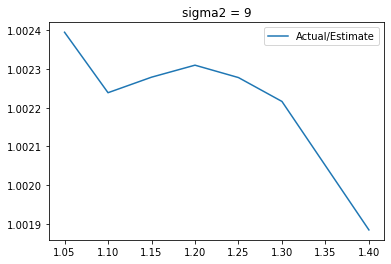

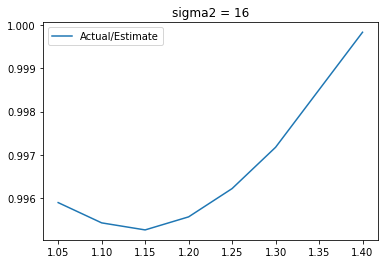

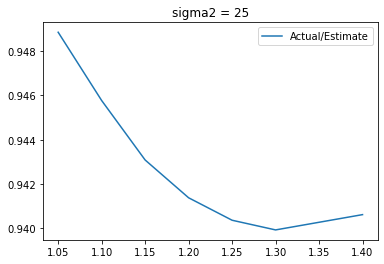

In [211]:

sigmas = [9, 16, 25]#np.array(list(range(9,36)))
x = np.array([1.05, 1.10, 1.15, 1.2, 1.25, 1.3, 1.4])
for sigma2 in sigmas:
    y_predict, y_actual = [], []
    for sF in x:
        baseName = lsst.meas.extensions.gaap.GaapFluxConfig.getGaapResultName(sF=sF, sigma=np.sqrt(sigma2), name="ext_gaap_GaapFlux")
        y_predict += [catalog[baseName+"_instFluxErr"].mean()]
        y_actual += [catalog[baseName+"_instFlux"].std()]
    
    fig, ax = plt.subplots()
    #ax.plot(x, y_actual, 'o--', color='C0', label='Actual')
    #ax.plot(x, y_predict, 's--', color='C1', label='Estimate')
    ax.plot(x, np.array(y_actual)/np.array(y_predict), label='Actual/Estimate')
    #ax.plot(x, 1/(np.pi)*1.59*x/np.sqrt((x-(2.336)**2)), '-', color='C2', label='Prediction')
    #popt1, pcov1 = curve_fit(func1, x, y_actual)
    #ax.plot(x, func1(x, *popt1), '--', color='C0', label='Fit to actual')
    #popt2, pcov2 = curve_fit(func1, x, y_predict)
    #ax.plot(x, func1(x, *popt2), '--', color='C1', label='Fit to estimate')
    #ax.plot(x, 0.5*x, label='Fit to estimate')
    ax.set_title(f"sigma2 = {sigma2}")
    ax.legend(loc='best')
    #print("Overall factor = ", popt1[1]/popt2[1])


In [21]:
curve_fit(func1, x, y_actual)

<ipython-input-19-ac83d6cbb455>:2: RuntimeWarning: invalid value encountered in sqrt
  return A*x/np.sqrt(x-p**2)


(array([2.3359807 , 1.59332546]),
 array([[ 0.00212243, -0.00059194],
        [-0.00059194,  0.00025527]]))

In [25]:
np.sqrt(np.pi)*0.94

1.666106619851185

In [177]:
catalog["ext_gaap_GaapFlux_flag"].sum()

0

# Let us look for systematic offsets

In [197]:
for sF in [1.05, 1.10, 1.15, 1.2, 1.25, 1.3, 1.4]:
    for sigma in [3.0, 4.0, 5.0]:
        baseName = lsst.meas.extensions.gaap.GaapFluxConfig.getGaapResultName(sF, sigma, name="ext_gaap_GaapFlux")
        print(sF, sigma, (catalog[baseName+"_instFlux"]-catalog["truth_instFlux"]).mean())

1.05 3.0 -8.640398998720798
1.05 4.0 -4.889193668085227
1.05 5.0 -3.1375592961770735
1.1 3.0 -0.0007403635750051762
1.1 4.0 0.0003441886252630866
1.1 5.0 0.00020540908121802204
1.15 3.0 -0.009107655052503105
1.15 4.0 2.174357200601662e-05
1.15 5.0 1.8262177263750345e-06
1.2 3.0 -0.012690230990642704
1.2 4.0 -2.9370905394898728e-05
1.2 5.0 -8.198514592550055e-06
1.25 3.0 -0.04324161379850011
1.25 4.0 -3.3652958109087194e-05
1.25 5.0 -6.50321180728497e-06
1.3 3.0 -0.09143999424304639
1.3 4.0 -9.868634674603527e-05
1.3 5.0 -3.0534547136085166e-05
1.4 3.0 -0.44093789163548536
1.4 4.0 -0.0005429241408592134
1.4 5.0 0.00011141509924073034


In general (for $sF \ge 1.1$), it looks like larger aperture leads to underestimation of flux. Could this be due to truncation effects?
    - Looks like increasing the bounding box helps a lot